In [12]:
%matplotlib inline
%matplotlib widget

import numpy as np
from matplotlib import pyplot as plt
import os.path as osp
import xarray as xr
import sys
import os
import glob
import pickle5 as pickle
import cartopy.crs as ccrs
import geopandas as gpd
import pandas as pd
import geoplot as gplt
import geoplot.crs as gcrs
from shapely.geometry import Polygon, Point, LineString
from shapely.ops import cascaded_union
import imageio

import birds

In [11]:
sys.path

['/home/fiona/birdMigration/notebooks',
 '/home/fiona/anaconda3/lib/python37.zip',
 '/home/fiona/anaconda3/lib/python3.7',
 '/home/fiona/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/home/fiona/.local/lib/python3.7/site-packages',
 '/home/fiona/anaconda3/lib/python3.7/site-packages',
 '/home/fiona/ipyleaflet',
 '/home/fiona/anaconda3/lib/python3.7/site-packages/pykalman-0.9.5-py3.7.egg',
 '/home/fiona/anaconda3/lib/python3.7/site-packages/test_pkg_birdMigration_fionalippert-0.1.0-py3.7.egg',
 '/home/fiona/anaconda3/lib/python3.7/site-packages/birds-0.1.0-py3.7.egg',
 '/home/fiona/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/fiona/.ipython']

In [10]:
from birds import abm

ImportError: cannot import name 'abm' from 'birds' (/home/fiona/anaconda3/lib/python3.7/site-packages/birds-0.1.0-py3.7.egg/birds/__init__.py)

In [3]:
root = '/home/fiona/birdMigration/data'
radar_path = osp.join(root, 'raw', 'radar', 'fall', '2015')
radars = datahandling.load_radars(radar_path)
sp = spatial.Spatial(radars)

NameError: name 'datahandling' is not defined

In [2]:
d = '/home/fiona/birdMigration/data/shapes'
countries = gpd.read_file(osp.join(d, 'ne_10m_admin_0_countries_lakes.shp'))
departure_area = gpd.read_file(osp.join(d, 'departure_area.shp'))

In [3]:
abm_dir = '/home/fiona/birdMigration/data/raw/abm/fall/2015'
files = glob.glob(os.path.join(abm_dir, '*.pkl'))

with open(files[0], 'rb') as f:
    result = pickle.load(f)
    traj = result['trajectories']
    states = result['states']

In [23]:
def background_map():
    extent=[0.36, 46.36, 16.07, 55.40]
    ax = gplt.polyplot(
      countries,
      edgecolor="white",
      facecolor="lightgray",
      figsize=(12, 8),
      projection=gcrs.AlbersEqualArea(),
      extent=extent
    )
    ax = gplt.polyplot(
        departure_area, 
        facecolor="lightgreen",
        alpha=0.5,
        ax=ax, zorder=1,
        extent=extent
    )
    return ax, extent

def draw_birds(traj, states, anim_path, tidx, time):
    ax, extent = background_map()
    
    flying = np.where(states==1)
    ground = np.where(states==0)
    if len(flying[0]) > 0:
        xx = traj[flying, 0].flatten()
        yy = traj[flying, 1].flatten()
        df = gpd.GeoSeries(gpd.points_from_xy(xx, yy, crs='epsg:4326'))
        gplt.pointplot(df, ax=ax, extent=extent, zorder=1, color='red', alpha=0.8)
        #points = [Point(x, y) for x,y in zip(xx, yy)]
        #gplt.pointplot(gpd.GeoSeries(points, crs='epsg:4326'), ax=ax, extent=extent, zorder=1, color='red', alpha=0.8)
    if len(ground[0]) > 0:
        xx = traj[ground, 0].flatten()
        yy = traj[ground, 1].flatten()
        points = [Point(x, y) for x,y in zip(xx, yy)]
        gplt.pointplot(gpd.GeoSeries(points, crs='epsg:4326'), ax=ax, extent=extent, zorder=2, color='blue', alpha=0.2)

    ax.set_title(time)
    file_name = osp.join(anim_path, f'{tidx}.png')
    plt.savefig(file_name, bbox_inches="tight", pad_inches=0.1)
    plt.close()
    return file_name

ax, extent = background_map()
for bidx in range(8):
    xx = traj[:,bidx,0]
    yy = traj[:,bidx,1]
    tr = LineString([Point(x, y) for x,y in zip(xx, yy)])
    start = Point(xx[0], yy[0])
    stopovers = [Point(x, y) for t, (x,y) in enumerate(zip(xx, yy)) if states[t, bidx]==0]
    gplt.polyplot(gpd.GeoSeries(tr, crs='epsg:4326'), ax=ax, zorder=2, extent=extent)
    gplt.pointplot(gpd.GeoSeries(stopovers, crs='epsg:4326'), ax=ax, zorder=3, extent=extent, edgecolor='black', color='white', linewidth=0.5)
    gplt.pointplot(gpd.GeoSeries(start, crs='epsg:4326'), ax=ax, zorder=3, extent=extent, color='red')
    
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
plt.savefig('/home/fiona/birdMigration/data/raw/abm/fall/2015/example_trajectories.png', dpi=300)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [220]:
with open('/home/fiona/birdMigration/data/model_performance/test_gnn3/outfluxes_linear+sigmoid.pickle', 'rb') as f:
    outfluxes = pickle.load(f)
len(outfluxes)

91

outfluxes for radar DE/FLD
DE/MEM tensor(0.)
DE/ISN tensor(0.)
DE/ESS tensor(0.0417)
DE/PRO tensor(0.)
DE/OFT tensor(0.1754)
DE/TUR tensor(0.)
DE/UMD tensor(0.0005)
BE/ZAV tensor(0.)
DE/EIS tensor(0.)
DE/FBG tensor(0.)
DE/NEU tensor(0.0002)
DE/NHB tensor(0.)
DE/HNR tensor(0.0033)
DE/ROS tensor(0.)
BE/WID tensor(0.)
BE/JAB tensor(0.)
DE/FLD tensor(0.9070)
DE/BOO tensor(0.)
DE/EMD tensor(0.)
DE/DRS tensor(0.)
NL/DBL tensor(0.)
NL/DHL tensor(0.)
(array([ 2,  4,  6, 10, 12, 16]),)


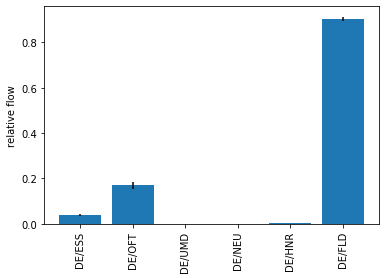

In [258]:
import torch
files = glob.glob(os.path.join('/home/fiona/birdMigration/data/raw/radar/fall/2015', '*.nc'))
radars = [xr.open_dataset(f).source for f in files]

r = 16
t=46
print(f'outfluxes for radar {radars[r]}')
for i, f in enumerate(outfluxes[t][r, :, 4]):
    print(radars[i], f.detach())

all_fluxes = []
for n in range(len(outfluxes)):
    for t in range(5):
        all_fluxes.append(outfluxes[n][r, :, t])
means = torch.stack(all_fluxes, -1).mean(-1).detach().numpy()
std = torch.stack(all_fluxes, -1).std(-1).detach().numpy()

idx = np.where(means > 0)
print(idx)
neighbors = np.array(radars)[idx]
x = np.arange(neighbors.size)

df = pd.DataFrame()
for i, r in enumerate(radars):
    df[r] = torch.stack(all_fluxes, -1)[i].detach().numpy()
    
fig, ax = plt.subplots()
ax.bar(x, means[idx], yerr=std[idx])
#ax.set_xticklabels(neighbors)
plt.xticks(ticks=x, labels=neighbors)
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('relative flow')
fig.savefig('/home/fiona/birdMigration/data/FLD_flows.png', dpi=300, bbox_inches='tight')

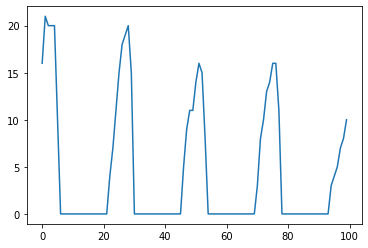

In [20]:
plt.plot(counts.reshape((counts.shape[0], -1)).sum(1))

In [20]:
abm_path = '/home/fiona/birdMigration/data/experiments/abm/fall/2015/experiment_2021-02-17 19:11:34.724467'

traj = []
states = []
for i in range(10):
    with open(osp.join(abm_path, f'simulation_results_{i}.pkl'), 'rb') as f:
        results = pickle.load(f)
    traj.append(results['trajectories'])
    states.append(results['states'])
traj = np.concatenate(traj, axis=1)
states = np.concatenate(states, axis=1)
traj.shape

(1465, 2944, 2)

In [ ]:

fp = osp.join(abm_path, 'animation_test')
os.makedirs(fp, exist_ok=True)
files = []
for tidx in range(50):
    files.append(draw_birds(results['trajectories'][tidx], results['states'][tidx], fp, tidx, results['time'][tidx]));

In [27]:
images = []
for file_name in files:
    images.append(imageio.imread(file_name))
gif_path = osp.join(abm_path, 'movie_5sets.gif')
imageio.mimsave(gif_path, images, fps=8)

(1465, 22) (1465, 22)


/home/fiona/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


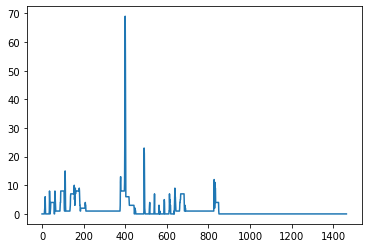

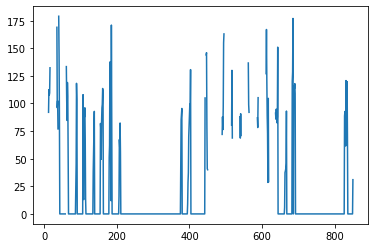

In [41]:
data = []
directions = []
files = glob.glob(os.path.join(abm_path, '*.pkl'))
for file in files:
    with open(file, 'rb') as f:
        result = pickle.load(f)
        data.append(result['counts'])
        directions.append(result['directions'])
        
data = np.stack(data, axis=-1).sum(-1)
directions = np.stack(directions, axis=-1).sum(-1)
directions = np.divide(directions, data)
print(data.shape, directions.shape)
counts = data.sum(1)

# plot total counts over time
fig, ax = plt.subplots()
ax.plot(data[:,0])

fig, ax = plt.subplots()
ax.plot(directions[:,0])

In [5]:
def bird_counts(data, tmin, tmax):
    minx = np.min(data['trajectories'][..., 0])
    miny = np.min(data['trajectories'][..., 1])
    maxx = np.max(data['trajectories'][..., 0])
    maxy = np.max(data['trajectories'][..., 1])
    gridx = np.arange(np.ceil(minx), np.ceil(maxx) + 1, 1)
    gridy = np.arange(np.ceil(miny), np.ceil(maxy) + 1, 1)
    counts = np.zeros((tmax-tmin, gridx.size, gridy.size))

    for bird in range(data['trajectories'].shape[1]):
        xx = np.digitize(data['trajectories'][tmin:tmax, bird, 0], gridx)
        yy = np.digitize(data['trajectories'][tmin:tmax, bird, 1], gridy)
        fidx = np.where(data['states'][tmin:tmax, bird] == 1)
        for t in fidx[0]:
            counts[t, xx[t], yy[t]] += 1

    return counts

In [17]:
counts = bird_counts(results, 400, 500)

In [18]:


import ipywidgets as widgets
from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots()
im = ax.imshow(counts[0])
#plt.colorbar(im)

#@widgets.interact(t=(0, 10, 1))
def animate(t):
    im.set_data(counts[t])
    fig.canvas.draw()
    
widgets.interact(animate, t=widgets.IntSlider(min=0,max=counts.shape[0]-1,step=1,value=0));

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=0, description='t', max=99), Output()), _dom_classes=('widget-interact',…

In [22]:
abm_path = '/home/fiona/birdMigration/data/experiments/abm/fall/2015/experiment_2021-02-17 19:11:34.724467'

traj = []
states = []
for i in range(10):
    with open(osp.join(abm_path, f'simulation_results_{i}.pkl'), 'rb') as f:
        results = pickle.load(f)
    traj.append(results['trajectories'])
    states.append(results['states'])
    
traj = np.concatenate(traj, axis=1)
states = np.concatenate(states, axis=1)

In [66]:
def make_grid(extent=[0.36, 46.36, 16.07, 55.40], res=0.5, crs='4326'):
    xmin, ymin, xmax, ymax = extent
    cols = np.arange(int(np.floor(xmin))-1, int(np.ceil(xmax))+1, res)
    rows = np.arange(int(np.floor(ymin))-1, int(np.ceil(ymax))+1, res)
    rows = rows[::-1]
    polygons = []
    for x in cols:
        for y in rows:
            polygons.append( Polygon([(x,y), (x+res, y), (x+res, y-res), (x, y-res)]) )

    grid = gpd.GeoDataFrame({'geometry':polygons}, crs=f'epsg:{crs}')
    return grid

def get_points(trajectories, states, state=1):
    df = gpd.GeoDataFrame({'geometry': []}, crs='epsg:4326')
    mask = np.where(states==state)
    if len(mask[0]) > 0:
        xx = trajectories[mask, 0].flatten()
        yy = trajectories[mask, 1].flatten()
        df['geometry'] = gpd.points_from_xy(xx, yy) #, crs='epsg:4326')
    return df

def get_directions(trajectories, states):
    


def aggregate(traj, states, grid, t_range, state):
    for t in t_range:
        merged = gpd.sjoin(get_points(traj[t], states[t], state), grid, how='left', op='within')
        merged[f'n_birds_{t}'] = 1
        dissolve = merged.dissolve(by="index_right", aggfunc="count")
        grid.loc[dissolve.index, f'n_birds_{t}'] = dissolve[f'n_birds_{t}'].values
    return grid

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

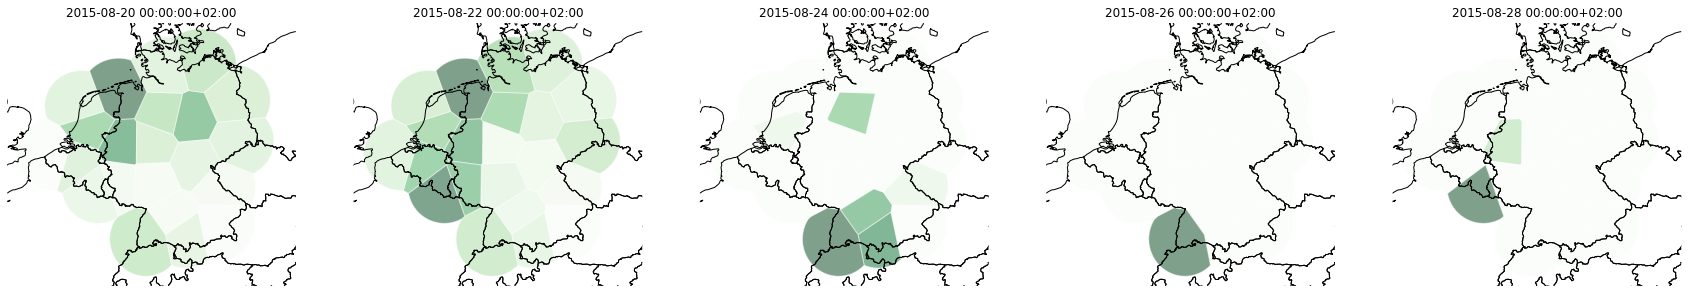

In [68]:
t_range = [108 + dt*24*2 for dt in range(5)]
grid = make_grid()
grid = gpd.read_file('/home/fiona/birdMigration/data/raw/radar/fall/2015/voronoi.shp').to_crs(epsg='4326')
grid = aggregate(traj, states, grid, t_range, state=1)

fig, axes = plt.subplots(1, 5, figsize=(30, 8), subplot_kw = {'projection' : gcrs.AlbersEqualArea()})
for i, ax in enumerate(axes):
    ax.set_title(results['time'][t_range[i]])
    ax = gplt.polyplot(
      countries,
      ax=ax,
      edgecolor="black",
      extent=extent, zorder=1
    )

    gplt.choropleth(
        grid, hue=f'n_birds_{t_range[i]}',
        edgecolor='white', linewidth=1, ax=ax, alpha=0.5, zorder=0,
        cmap='Greens', legend=False, extent=extent
    );

In [86]:
t_range = range(500)
grid = make_grid()
voronoi = gpd.read_file('/home/fiona/birdMigration/data/raw/radar/fall/2015/voronoi.shp').to_crs(epsg='4326')
counts_vor = aggregate(traj, states, voronoi, t_range, state=1)
counts_vor = counts_vor.fillna(0)

In [87]:
radars = [Point(row.x, row.y).buffer(25_000) for i, row in voronoi.iterrows()]
radars = gpd.GeoDataFrame({'radar': voronoi['radar'], 'geometry': radars}, crs='epsg:3035').to_crs(epsg='4326')
counts_rad = aggregate(traj, states, radars, t_range, state=1)
counts_rad = counts_rad.fillna(0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

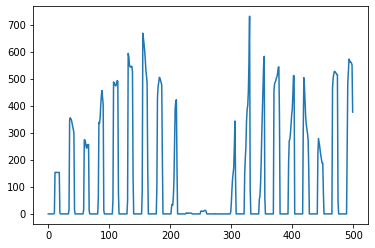

In [95]:
fig, ax = plt.subplots(4, 2, figsize=(15,12))
#rad_area = np.pi * 25_000**2
vor_areas = voronoi.to_crs(epsg='3035').area
rad_areas = radars.to_crs(epsg='3035').area
for i in range(4):
    vor = [counts_vor.iloc[i][f'n_birds_{t}'] for t in t_range]
    rad = [(counts_rad.iloc[i][f'n_birds_{t}'] / rad_areas.iloc[i]) * vor_areas.iloc[i] for t in t_range]
    ax[i,0].plot(t_range, vor)
    ax[i,1].plot(t_range, rad)
    ax[i,0].set_title(f'{counts.iloc[i].radar} voronoi cell')
    ax[i,1].set_title(f'{counts.iloc[i].radar} 25km around radar')
plt.close(fig)

plt.plot([counts_vor[f'n_birds_{t}'].sum() for t in t_range])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

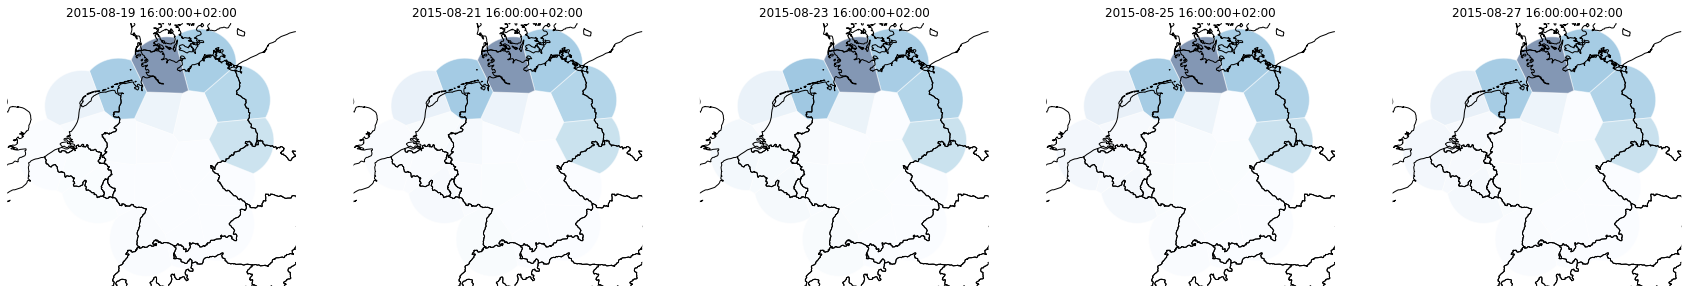

In [69]:
t_range = [100 + dt*24*2 for dt in range(5)]
grid = aggregate(traj, states, grid, t_range, state=0)

fig, axes = plt.subplots(1, 5, figsize=(30, 8), subplot_kw = {'projection' : gcrs.AlbersEqualArea()})
for i, ax in enumerate(axes):
    ax.set_title(results['time'][t_range[i]])
    ax = gplt.polyplot(
      countries,
      ax=ax,
      edgecolor="black",
      extent=extent, zorder=1
    )

    gplt.choropleth(
        grid, hue=f'n_birds_{t_range[i]}',# projection=gcrs.AlbersEqualArea(),
        edgecolor='white', linewidth=1, ax=ax, alpha=0.5, zorder=0,
        cmap='Blues', legend=False, extent=extent
    );

In [ ]:
ax = gplt.voronoi(
    injurious_collisions.head(100),
    clip=boroughs.simplify(0.001), projection=gcrs.AlbersEqualArea()
)
gplt.polyplot(boroughs, ax=ax)

In [54]:
ds = xr.open_dataset('/home/fiona/birdMigration/data/raw/env/fall/2015/wind_850.nc')

In [60]:
ds[['u', 'v']]

<xarray.Dataset>
Dimensions:    (latitude: 35, longitude: 61, time: 2928)
Coordinates:
  * longitude  (longitude) float32 0.916 1.1660167 ... 15.666984 15.917
  * time       (time) datetime64[ns] 2015-08-01 ... 2015-11-30T23:00:00
  * latitude   (latitude) float32 55.274 55.024 54.774 ... 47.274 47.024 46.774
Data variables:
    u          (time, latitude, longitude) float32 ...
    v          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-02-12 08:55:40 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [64]:
l = [[1,2], [3,2], [1,5]]
x = [c[0] for c in l]

In [65]:
x

[1, 3, 1]

In [96]:
with open('/home/fiona/birdMigration/data/experiments/abm/fall/2015/experiment_2021-02-19 14:59:15.605822/simulation_results_0.pkl', 'rb') as f:
    data = pickle.load(f)